<a href="https://colab.research.google.com/github/Faraaztqureshi/DS-Unit-2-Linear-Models/blob/master/Faraaz_Qureshi_016_DS10_regression_classification_assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 2, Sprint 1, Module 1*

---

# Regression 1

## Assignment

You'll use another **New York City** real estate dataset. 

But now you'll **predict how much it costs to rent an apartment**, instead of how much it costs to buy a condo.

The data comes from renthop.com, an apartment listing website.

- [ ] Look at the data. Choose a feature, and plot its relationship with the target.
- [ ] Use scikit-learn for linear regression with one feature. You can follow the [5-step process from Jake VanderPlas](https://jakevdp.github.io/PythonDataScienceHandbook/05.02-introducing-scikit-learn.html#Basics-of-the-API).
- [ ] Define a function to make new predictions and explain the model coefficient.
- [ ] Organize and comment your code.

> [Do Not Copy-Paste.](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) You must type each of these exercises in, manually. If you copy and paste, you might as well not even do them. The point of these exercises is to train your hands, your brain, and your mind in how to read, write, and see code. If you copy-paste, you are cheating yourself out of the effectiveness of the lessons.

## Stretch Goals
- [ ] Do linear regression with two or more features.
- [ ] Read [The Discovery of Statistical Regression](https://priceonomics.com/the-discovery-of-statistical-regression/)
- [ ] Read [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf), Chapter 2.1: What Is Statistical Learning?

# Data Preprocessing

In [0]:
import sys

# If you're on Colab:
if 'google.colab' in sys.modules:
    DATA_PATH = 'https://raw.githubusercontent.com/LambdaSchool/DS-Unit-2-Applied-Modeling/master/data/'

# If you're working locally:
else:
    DATA_PATH = '../data/'
    
# Ignore this Numpy warning when using Plotly Express:
# FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning, module='numpy')

In [0]:
# Read New York City apartment rental listing data
import pandas as pd
df = pd.read_csv(DATA_PATH+'apartments/renthop-nyc.csv')
assert df.shape == (49352, 34)

In [0]:
# Remove outliers: 
# the most extreme 1% prices,
# the most extreme .1% latitudes, &
# the most extreme .1% longitudes
df = df[(df['price'] >= 1375) & (df['price'] <= 15500) & 
        (df['latitude'] >=40.57) & (df['latitude'] < 40.99) &
        (df['longitude'] >= -74.1) & (df['longitude'] <= -73.38)]

In [0]:
## import the libraries I will use
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## inspect the data
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Seperate Data into Feature and Target

In [6]:
## the target variable will be price
## we want all the rows but only the price column (index position 7)
y = df.iloc[:, 7]

0        3000
1        5465
2        2850
3        3275
4        3350
         ... 
49347    3200
49348    3950
49349    2595
49350    3350
49351    2200
Name: price, Length: 48818, dtype: int64

In [0]:
## since we only need one feature for this assignment I will look at doorman
X = df.iloc[:, 14]

# Plot Doorman vs Price

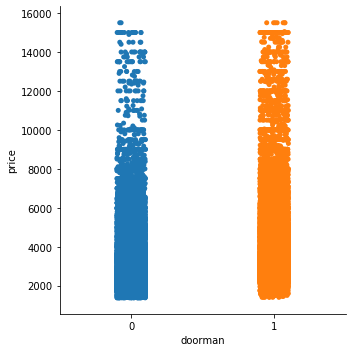

In [25]:
import seaborn as sns
import plotly.express as px
sns.catplot(x='doorman', y='price', data = df)

# 5 step Linear Regression

In [0]:
## step 1 is to import the right tool from sklearn
from sklearn.linear_model import LinearRegression

In [0]:
## step 2 instantiate the LinearRegression class
model = LinearRegression()

In [0]:
## step 3 set up X_train (feature) and y_train (target)
features = ['doorman']
target = 'price'
X_train = df[features]
y_train = df[target]


In [21]:
## step 4 fit the model
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [22]:
## step 5 apply model to new data
## lets check to see the difference between doorman or not
doorman = 1
X_test = [[doorman]]
y_pred = model.predict(X_test)

y_pred

array([4145.98934426])

In [23]:
## predicted price if no doorman
doorman = 0
X_test = [[doorman]]
y_pred = model.predict(X_test)

y_pred

array([3161.1649334])

# Explain Coefficient and Intercept

In [26]:
## slope is $984
## since there are only two conditions doorman or not
## this result is saying that doorman apartments will be ($984) more expensive
model.coef_

array([984.82441086])

In [27]:
## this is the predicted price of a non-doorman apartment 
model.intercept_

3161.164933399815

# Try a linear regression with multiple features

In [31]:
df.head()

,bathrooms,bedrooms,created,description,display_address,latitude,longitude,price,street_address,interest_level,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,2016-06-24 07:54:24,A Brand New 3 Bedroom 1.5 bath ApartmentEnjoy ...,Metropolitan Avenue,40.7145,-73.9425,3000,792 Metropolitan Avenue,medium,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,2016-06-12 12:19:27,,Columbus Avenue,40.7947,-73.9667,5465,808 Columbus Avenue,low,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,2016-04-17 03:26:41,"Top Top West Village location, beautiful Pre-w...",W 13 Street,40.7388,-74.0018,2850,241 W 13 Street,high,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,2016-04-18 02:22:02,Building Amenities - Garage - Garden - fitness...,East 49th Street,40.7539,-73.9677,3275,333 East 49th Street,low,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,2016-04-28 01:32:41,Beautifully renovated 3 bedroom flex 4 bedroom...,West 143rd Street,40.8241,-73.9493,3350,500 West 143rd Street,low,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [0]:
## step 1 is to import the right tool from sklearn
from sklearn.linear_model import LinearRegression

In [0]:
## step 2 instantiate the LinearRegression class
model = LinearRegression()

In [0]:
## need to seperate all independent variables I want to look at  from target variable
## although I wanted to keep interest level as that can lead to bidding wars and higher prices
## I did not feel like encoding the categorical variable right now

df1 = df.drop(['price', 'created', 'description', 'display_address', 'street_address', 'interest_level'], axis = 1)
X = df1

In [92]:
y

0        3000
1        5465
2        2850
3        3275
4        3350
         ... 
49347    3200
49348    3950
49349    2595
49350    3350
49351    2200
Name: price, Length: 48818, dtype: int64

In [0]:
y = df['price']

In [93]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [97]:
## look at the coefficients for the features in the model
model.coef_

array([ 1.79090878e+03,  4.78808051e+02,  1.73846495e+03, -1.37175719e+04,
        1.41168185e+02, -3.91212322e+01, -2.30342108e+02,  1.01786013e+02,
        4.86518660e+02,  4.76830027e+01, -1.70073609e+02, -2.73938335e+02,
        1.48488026e+02, -6.33504405e+01,  4.55734165e+02, -1.71929805e+02,
       -1.21915788e+02,  2.45761206e+02, -3.29248695e+02, -7.62871187e+00,
        6.77224300e+01, -1.51842616e+02,  1.45871152e+02,  1.00168583e+02,
        1.41005568e+02,  5.67885917e+01,  2.01894760e+02, -6.85885592e+01])

In [103]:
## I would prefer to see my values in thier true non-scientific form
import numpy as np
np.set_printoptions(suppress=True)
a

array([  1790.9087848 ,    478.80805092,   1738.46495166, -13717.57185315,
          141.16818489,    -39.12123225,   -230.34210763,    101.78601307,
          486.51865983,     47.68300273,   -170.07360888,   -273.93833528,
          148.48802614,    -63.35044051,    455.73416515,   -171.92980547,
         -121.91578846,    245.76120584,   -329.24869453,     -7.62871187,
           67.72242997,   -151.84261617,    145.87115249,    100.16858304,
          141.00556784,     56.78859175,    201.89475962,    -68.58855916])

In [100]:
a[0]

1790.9087848029737

In [95]:
model.intercept_

-1085103.047389402

In [110]:
model.score(X, y)

0.6205435222206348

In [114]:
## highest coefficents
## 1 (bathroom), 2 (bedrooms), 3 (latitute), 4 (longitude), 9 (doorman) 15 (laundry in unit)
df1.head()

,bathrooms,bedrooms,latitude,longitude,elevator,cats_allowed,hardwood_floors,dogs_allowed,doorman,dishwasher,no_fee,laundry_in_building,fitness_center,pre-war,laundry_in_unit,roof_deck,outdoor_space,dining_room,high_speed_internet,balcony,swimming_pool,new_construction,terrace,exclusive,loft,garden_patio,wheelchair_access,common_outdoor_space
0,1.5,3,40.7145,-73.9425,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1.0,2,40.7947,-73.9667,1,1,0,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1.0,1,40.7388,-74.0018,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1.0,1,40.7539,-73.9677,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1.0,4,40.8241,-73.9493,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Analysis.  After doing my regression I was able to determine that bathrooms, bedrooms, latitude, longitude, doorman and laundry in the unit as the features that have the most direct impact on the rental price.  This makes sense.  The more bedrooms or bathrooms you have the larger your place (in most cases) and the more it will cost.  Latitude and longitude also play a key role, because they determine what neighborhood you will be in.  Neighborhoods in New York can have vastly different price points.  It also makes sense that doorman and laundry in unit would be critically important because a doorman probably means your building has nicer amenities and those cost more money to have.  Laundry in your unit is a convenience and it makes sense you would pay more for units with laundry machines already in place.

***I wanted to try this process again, and create a function***

In [0]:
## lets look at bedrooms, bathrooms and doorman

features = ['doorman', 'bathrooms', 'bedrooms']
target = 'price'
X_train = df[features]
y_train = df[target]

In [117]:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [126]:
model.intercept_

292.1809087046254

In [122]:
model.coef_

array([ 747.50146534, 1902.06118927,  444.93159865])

In [124]:
## check a 2 bedroom, 2 bath with a doorman
bedrooms = 2
bathrooms = 2
doorman = 1
X_test = [[bedrooms, bathrooms, doorman]]
y_pred = model.predict(X_test)

y_pred

array([6036.23781658])

In [127]:
## check 2br/2bath with no doorman
bedrooms = 2
bathrooms = 2
doorman = 0
X_test = [[bedrooms, bathrooms, doorman]]
y_pred = model.predict(X_test)

y_pred

array([5591.30621792])

In [0]:
def projected_rent(bedrooms, bathrooms, doorman):
  '''This function is used to determine projected rent.  Needs 3 inputs:
     number of bedrooms, number of bathrooms and doorman [0 for no doorman and 1 if 
     there is a doorman]'''
  X_test = [[bedrooms, bathrooms, doorman]]
  y_pred = model.predict(X_test)
  return y_pred


In [129]:
projected_rent(2, 2, 0)

array([5591.30621792])

In [130]:
## this should be 747 more than the last one because we added one bedroom 
## and that adds 747 dollars to rent according to our model

projected_rent(3, 2, 0)

array([6338.80768326])

In [131]:
6338 - 5591

747